In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dbs = pd.read_csv("dbs_7y.csv")
dbs = dbs.set_index("Date")
uob = pd.read_csv("uob_7y.csv")
uob = uob.set_index("Date")

# ADF Test for Stationarity

- Null H_0: stationary
- H_1: non-stationary

In [12]:
# Step 1: Test for Stationarity
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', '#Observations Used']
    for label, value in zip(labels, result):
        print(f'{label} : {value}')
    if result[1] <= 0.05:
        print("Reject the null hypothesis - Series is stationary")
    else:
        print("Fail to reject the null hypothesis - Series is non-stationary")


adf_test(dbs['Close'])
print("\n")
adf_test(uob['Close'])

ADF Test Statistic : -0.2971304717899534
p-value : 0.9259097611822451
#Lags Used : 25
#Observations Used : 1987
Fail to reject the null hypothesis - Series is non-stationary


ADF Test Statistic : -0.6088785977767606
p-value : 0.8689631803732963
#Lags Used : 8
#Observations Used : 2004
Fail to reject the null hypothesis - Series is non-stationary


# Engle Granger Test for cointegration

- Null Hypo H_0: No cointegration exists
- H_1 cointegration exists

In [16]:
#Step 2: Differencing
from statsmodels.tsa.stattools import coint

def engle_granger_test(series1, series2):
    series1_diff = series1 #.diff().dropna()
    series2_diff = series2 #.diff().dropna()
    result = coint(series1_diff, series2_diff)
    labels = ['Cointegration Test Statistic', 'p-value', '#Critical Values']
    for label, value in zip(labels, result):
        print(f'{label} : {value}')
    if result[1] <= 0.05:
        print("Reject the null hypothesis - Series are cointegrated")
    else:
        print("Fail to reject the null hypothesis - Series are not cointegrated")


engle_granger_test(dbs['Close'], uob['Close'])
print("\n")
engle_granger_test(dbs['Open'], uob['Open'])


Cointegration Test Statistic : -3.6675448253229224
p-value : 0.020161396643679923
#Critical Values : [-3.90189157 -3.33916851 -3.04655862]
Reject the null hypothesis - Series are cointegrated


Cointegration Test Statistic : -4.302896980130067
p-value : 0.002533924896563857
#Critical Values : [-3.90189157 -3.33916851 -3.04655862]
Reject the null hypothesis - Series are cointegrated


p_value low, accept H_1 that stocks are cointegrated

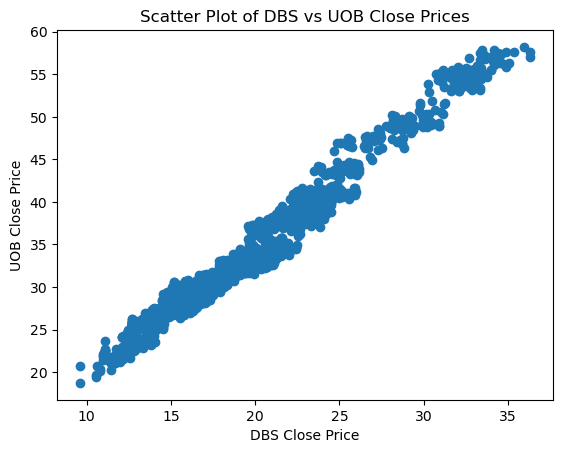

In [ ]:
plt.scatter(dbs['Close'], uob['Close'], 'o')
plt.xlabel('DBS Close Price')
plt.ylabel('UOB Close Price')
plt.title('Scatter Plot of DBS vs UOB Close Prices')
plt.show()